In [1]:
def get_result(dataset, recommender):
    precs, recs, preds = [], [], []
    result = 'result/' + recommender + '_' + dataset + '.txt'
    with open(result) as result_file:
        for line in result_file.readlines()[1:]:
            uid, prec, rec, pred = line.strip().split('\t')
            precs.append(float(prec))
            recs.append(float(rec))
            preds.append(float(pred))
    return precs, recs, preds

In [21]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats

def plt_chart(x, y, title, x_label, y_label):
    fig, ax = plt.subplots()
    ax.scatter(x, y)
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    ax.set_title(title)

def get_corr(x, y):
    # (correlation, p-value)
    pearson = scipy.stats.pearsonr(x, y)
    # SpearmanrResult(correlation, pvalue)
    spearman = scipy.stats.spearmanr(x, y)
    # KendalltauResult(correlation, pvalue)
    kendall = scipy.stats.kendalltau(x, y)
    print(f'Pearson:\n\tcorr: {round(pearson[0], 3)}\n\tp-value: {round(pearson[0], 3)}\n')
    print(f'Spearman:\n\tcorr: {round(spearman.correlation, 3)}\n\tp-value: {round(spearman.pvalue, 3)}\n')
    print(f'Kendall:\n\tcorr: {round(kendall.correlation, 3)}\n\tp-value: {round(kendall.pvalue, 3)}\n')
    

Pearson:
	corr: 0.001
	p-value: 0.001

Spearman:
	corr: -0.001
	p-value: 0.905

Kendall:
	corr: -0.001
	p-value: 0.905



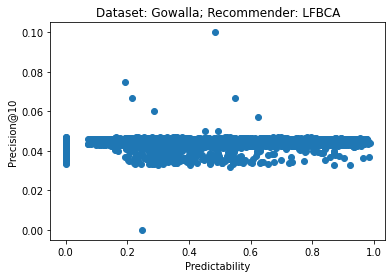

In [22]:
ds, rc = 'gowalla', 'lfbca'
precs, recs, preds = get_result(ds, rc)
plt_chart(preds, precs, 'Dataset: Gowalla; Recommender: LFBCA', 'Predictability', 'Precision@10')
get_corr(preds, precs)

Pearson:
	corr: 0.001
	p-value: 0.001

Spearman:
	corr: -0.001
	p-value: 0.905

Kendall:
	corr: -0.001
	p-value: 0.905



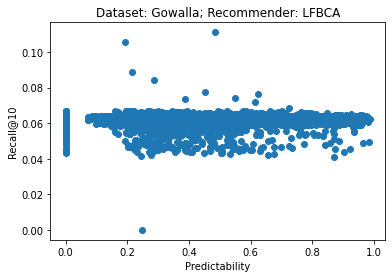

In [24]:
ds, rc = 'gowalla', 'lfbca'
precs, recs, preds = get_result(ds, rc)
get_corr(preds, precs)
plt_chart(preds, recs, 'Dataset: Gowalla; Recommender: LFBCA', 'Predictability', 'Recall@10')